<a href="https://colab.research.google.com/github/gorzanskik-ai/machine-learning/blob/main/supervised-learning/02_regression/05_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sns.set(font_scale=1.3)
sklearn.__version__

'1.0.2'

Generacja danych

In [45]:
X = np.arange(-10, 10, 0.5)
noise = 123 * np.random.randn(40)
y = -X**3 + 12*X**2 + 5*X + noise
X = X.reshape(40, 1)

[]

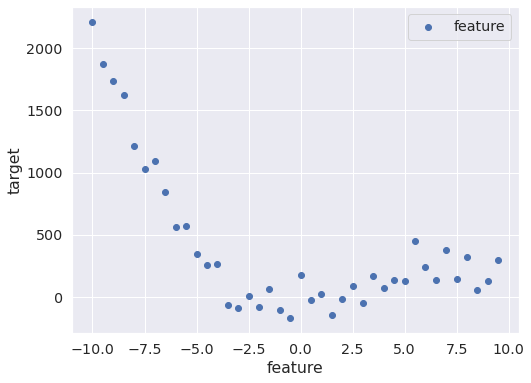

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='feature')
plt.xlabel('feature')
plt.ylabel('target')
plt.legend()
plt.plot()

Model liniowy

[]

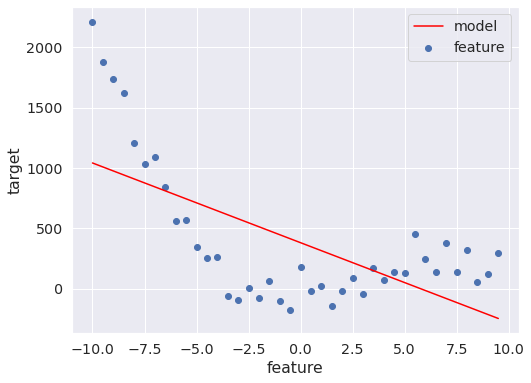

In [47]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
y_pred_lin = lr.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='feature')
plt.plot(X, y_pred_lin, label='model', color='red')
plt.xlabel('feature')
plt.ylabel('target')
plt.legend()
plt.plot()

In [48]:
from sklearn.metrics import r2_score

r2_score(y, y_pred_lin)

0.41847642890203696

#Regresja wielomianowa

Regresja stopnia 2

In [49]:
df = pd.DataFrame({'X': X.ravel()})
df.head()

,X
0,-10.0
1,-9.5
2,-9.0
3,-8.5
4,-8.0


In [50]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X)
X_poly

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

In [51]:
X_poly.shape

(40, 3)

In [52]:
df = pd.DataFrame(X_poly)
df.columns = ['1', 'X', 'X^2']
df.head()

,1,X,X^2
0,1.0,-10.0,100.00
1,1.0,-9.5,90.25
2,1.0,-9.0,81.00
3,1.0,-8.5,72.25
4,1.0,-8.0,64.00


[]

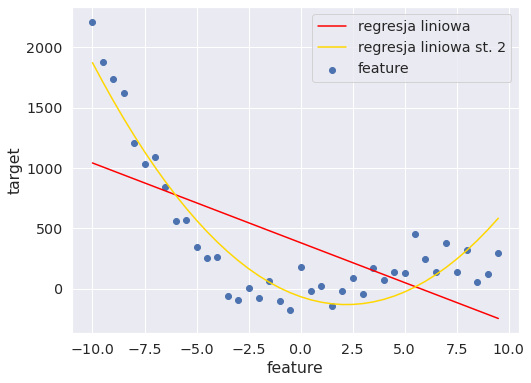

In [53]:
lr = LinearRegression()
lr.fit(X_poly, y)
y_pred_2 = lr.predict(X_poly)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='feature')
plt.plot(X, y_pred_lin, label='regresja liniowa', color='red')
plt.plot(X, y_pred_2, label='regresja liniowa st. 2', color='gold')
plt.xlabel('feature')
plt.ylabel('target')
plt.legend()
plt.plot()

In [54]:
r2_score(y, y_pred_2)

0.8797915905206997

Regresja stopnia 3

In [55]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
df = pd.DataFrame(X_poly)
df.head()

,0,1,2,3
0,1.0,-10.0,100.00,-1000.000
1,1.0,-9.5,90.25,-857.375
2,1.0,-9.0,81.00,-729.000
3,1.0,-8.5,72.25,-614.125
4,1.0,-8.0,64.00,-512.000


[]

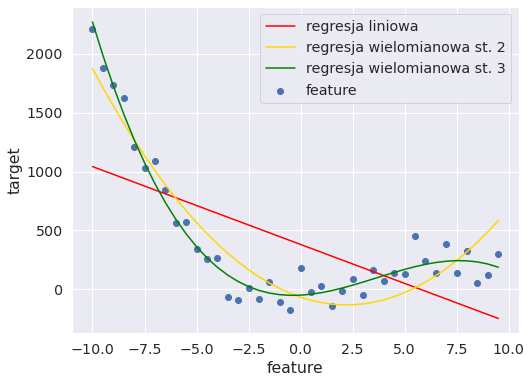

In [56]:
lr = LinearRegression()
lr.fit(X_poly, y)
y_pred_3 = lr.predict(X_poly)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='feature')
plt.plot(X, y_pred_lin, label='regresja liniowa', color='red')
plt.plot(X, y_pred_2, label='regresja wielomianowa st. 2', color='gold')
plt.plot(X, y_pred_3, label='regresja wielomianowa st. 3', color='green')
plt.xlabel('feature')
plt.ylabel('target')
plt.legend()
plt.plot()

In [57]:
r2_score(y, y_pred_3)

0.9668083305427664

Metryki

In [58]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [59]:
results = pd.DataFrame(data={
    'name': ['regresja liniowa', 'regresja wielomianowa st. 2', 'regresja wielomianowa st. 3'],
    'r2_score': [r2_score(y, y_pred_lin), r2_score(y, y_pred_2), r2_score(y, y_pred_3)],
    'mae': [mae(y, y_pred_lin), mae(y, y_pred_2), mae(y, y_pred_3)],
    'mse': [mse(y, y_pred_lin), mse(y, y_pred_2), mse(y, y_pred_3)],
    'rmse': [np.sqrt(mse(y, y_pred_lin)), np.sqrt(mse(y, y_pred_2)), np.sqrt(mse(y, y_pred_3))]    
    })
results

,name,r2_score,mae,mse,rmse
0,regresja liniowa,0.418476,377.468236,202388.974363,449.876621
1,regresja wielomianowa st. 2,0.879792,174.439383,41836.406835,204.539499
2,regresja wielomianowa st. 3,0.966808,88.516996,11551.772401,107.479172
